## 06. 2.9 non-self-consistent poisson 방정식

$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-qp(x)+qn(x)-qN_{dop}^+(x)$$

### Gate potential
* Let us assume that VG=0V
  - However, the electrostatic potential is ***<U>NOT</U>*** 0V at that point.
  - For the gate metal, the workfunction is known. The workfunction is the energy difference between the vacuum level and the Fermi level.
  - Therefore, when the workfunctin is 4.3V, the vacuum level is located at4.3eV, because the Fermi level is the energy reference.
  - Moreover, the energy difference between the vacuum level and the intrinsic Fermi level of silicon is given.(About 4.63eV)
  - Then, the intrinsic Fermi level of silicon is located at -0.33eV.
  - Finally, the electrostatic potential is 0.33V.
### Double-Gate MOS revisted
* Now apply the realistic boundary condition.
  - When the gate metal whose workfunctin is 4.3eV, the boundary value of the electrostatic potential is <span style="color:red">0.33374V</span>.
  - Solve the same problem. Neglect the carrier densities.
  - The gate voltage varies from 0V to 1V.
### Results at VG=0V and 1V
* Can you find something wrong?
  - Depletion approximation?
### Electron density(1)
* Effective density-of-states of the conduction band, NC
  - For example, NC of silicon at 300K is about 2.86e19cm-3.
* Electron density
  - Assume the Boltzmann statistics
  - At equilibrium, the electron density can be obtained by
    $$n(r)=N_C exp \left(\frac{E_F-E_C}{k_BT} \right) $$
    $E_F$: Fermi level
    $E_C$: Conductin band minimum
    $k_B$: Boltzmann constant
    $T$: Temperature
  - At 300K, $k_BT \approx 25.85meV$
### Electron density(2)
* Remember that $E_F=0$. Then
  $$n(r)=N_C exp \left(\frac{0-E_C}{k_BT} \right) $$
  - Also, the energy difference between $E_C$ and $E_i$ is a given constant.
    $$n(r)=N_C exp \left(\frac{-E_C}{k_BT} \right) = N_C exp \left(-\frac{E_C-E_i+E_i}{k_BT} \right)$$
  - Using $E_i=-q\phi$, we can obtain
    $$n(r) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right) = n_i exp \left(\frac{q\phi}{k_BT} \right) = n_i exp\left(\frac{\phi}{V_T} \right)$$
    $$p(r) = n_i exp\left(-\frac{\phi}{V_T} \right) $$
    $$n(r)p(r)=n_{int}^2 $$
### Python
* Step-by-step producre
* First, set up the strucutre
* Next, set the matrix, A.(Five cases)
* The vector, b, has the correct boundary values.
* Get the solution, $\phi$
* Using phi, the electron density is estimated.
* Plot it.
* Graph with $N_{acc}=1e18cm^{-3}$
### Problem
* Write your own code for the double-gate structure, whose oxide thickness is 0.8nm.
* The electrostatic potential is obtatined under the depletion approximation.
* (The initial potential) The electron density is calculated by assuming $n_i exp \left(\frac{q\phi}{k_BT} \right)$.
* Then, using the electron density, re-calculate the potential. (The updated potential)
* Check their difference for several gate voltages from 0V to 1V. (The voltage step is 0.1V. 11 points in total.)

## <span style="color:red">다시 생각해 보자.</span>
지금까지 double-gate MOS 구조에 대해 Poisson 방정식을 풀 수 있었다. Electrostatic potential을 구했고, 전자 농도와 홀 농도를 구하였다. 하지만 이 결과는 본래의 Poisson 방정식의 완벽한 해가 아니다. 
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-qN_{dop}^+(x)$$
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-qp(x)+qn(x)-qN_{dop}^+(x)$$
따라서 올바른 Poisson 방정식에 $\phi_0(x)$ 해로 대입해 보면,
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi_0(x) \right] \ne -qn_{int}exp\left(-\frac{q\phi_0(x)}{k_BT} \right)+qn_{int}exp\left(\frac{q\phi_0(x)}{k_BT} \right)-qN_{dop}^+(x) $$
와 같이 <span style="color:red">**등식이 성립하지 않을 것이다**</span>.   
<span style="color:blue">**올바른 해가 아닌 $\phi_0(x)$로 계산한 전자 농도와 홀 농도도 올바른 값은 아니다.    
결국 $\phi_0(x)$에서부터 시작하여 이를 수정해나가서 올바른 해를 찾아야 한다.   
이 절의 제목이 "Non-self-consistent Poisson 방정식"임을 기억하자.(depletion approximation). 이 "non-self-consistent"라는 표현은 Poisson 방정식에 들어가는 전자 농도 및 홀 농도가 electrostatic potential과 일관된 방식(self-consistent manner)로 주어지지 않는 상황을 나타내기 위한 것이다. 즉, 전하 분포에 대한 electrostatic potential 해는 구했지만, 그 electrostatic potential에 대한 전하의 분포는 원래 주어진 전하 분포와 다른 상황이다. 이러한 모순적인 상황을 해결하여 전자 농도 및 홀 농도에 대한 식과 Poisson 방정식을 모순 없이 일관되게 풀어주는 것이 Numerical의 과제이다.   
이러한 모순의 근원이 무엇인지 생각해 보자. 모순의 근원은 electrostatic potential에 비선형적으로 변하는 전자 농도와 홀 농도의 식이 도입되었기 때문이다. 즉 전자농도와 홀 농도가 
    $$n(r) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right) = n_{int} exp \left(\frac{q\phi}{k_BT} \right) = n_{int} exp\left(\frac{\phi}{V_T} \right)$$
    $$p(r) = n_{int} exp\left(-\frac{\phi}{V_T} \right) $$
와 같은 $\phi$가 비선형 함수가 아니라면(혼돈스럽지만 비선형 함수, 이 경우 아래의 python code를 자세히 보면, Nacc의 phi를 먼저 구하고, 나중에 전자, 홀 농도를 phi에 따라서 구하게 된다. 이것을 non-self-consistent, depletion approximation이다.) 모순이 생기지 않을 것이다. 따라서, 비선형 방정식의 해를 어떻게 구하는 알아야 한다.   
다음장에서는 phi가 변함과 같이 전자 홀 농도가 변하는 coding(newton-raphson, jacobian)하게 된다. 이것이 self-consistent이다**</span>. 

### Numerical
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=b(x)$$
$$\epsilon(x)=
\begin{cases}
\epsilon_1 &, 0 \le x < t1 \\
\epsilon_2 &, t1 \le x < t1+t2 \\
\epsilon_1 &, t1+t2 \le x < a
\end{cases}
$$
* When we take the <span style="color:red">depletion approximation</span>
$$b(x)=
\begin{cases}
\phi_0 &, x=0 \\
0 &, 0 < x < t1 \\
qN_{acc} &, t1 \le x < t1+t2 \\
0 &, t1+t2 < x < a \\
\phi_0 &, x=a
\end{cases}
$$
$$\phi(0)=\phi(a)=0 $$
* If we add an electron(hole) density to the $b(x)$ of the depletion approximation
$$b(x)= 
\begin{cases}
\phi_0+V_g &, x=0 \\
0 &, 0 < x < t1 \\
qN_{acc}+q(n(x)-p(x)) &, t1 \le x < t1+t2 \\
0 &, t1+t2 < x < a \\
\phi_0+V_g &, x=a
\end{cases}
$$
* Where $V_a$ is a gate voltage, $n(x), p(x)$ is an electron, hole density
$$n(x) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right)$$
$$p(x) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(-\frac{q\phi}{k_BT} \right)$$
$$q(n(x)-p(x)) = 2qN_C exp^{-\frac{E_C-E_i}{k_BT}}sinh\left(\frac{q\phi}{k_BT} \right) $$
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-\rho(x), \quad \rho(x)=q(p(x)-n(x)-N_{acc})$$
$$n(r) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right) = n_i exp \left(\frac{q\phi}{k_BT} \right) = n_i exp\left(\frac{\phi}{V_T} \right)$$

* By the finite difference
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx} \right] \rightarrow A$$

$$\phi_0=0.33374V$$
$$b(x)=(\Delta x)^2
\begin{bmatrix}
\phi_0+V_g \\ 0 \\ \cdots \\ \frac{qN_{acc}}{2\epsilon_0}+q(n(x)-p(x)) \\ \frac{qN_{acc}}{\epsilon_0}+q(n(x)-p(x)) \\ \cdots \\ \frac{qN_{acc}}{\epsilon_0}+q(n(x)-p(x)) \\ \frac{qN_{acc}}{2\epsilon_0}+q(n(x)-p(x)) \\ \cdots \\ 0 \\ \phi_0+V_g
\end{bmatrix}
$$

$$\phi(x)
\begin{bmatrix}
\phi_1 \\ \cdots \\ \phi_N
\end{bmatrix}
$$
#### Algorithm
1. Initial $\phi(x)$ depletion approximation으로 $\phi(x)$ 구함
2. $\phi(x)$로 $n(x),p(x)$ 구함
3. $\frac{d}{dx}\left(\epsilon\frac{d}{dx}\phi(x) \right)=qn(x)-qp(x)+qN_{acc}$로 다시 $\phi(x)$ 구함
4. Termination condition, $|\phi_{new}-\phi_{old}|<Error$ 검증

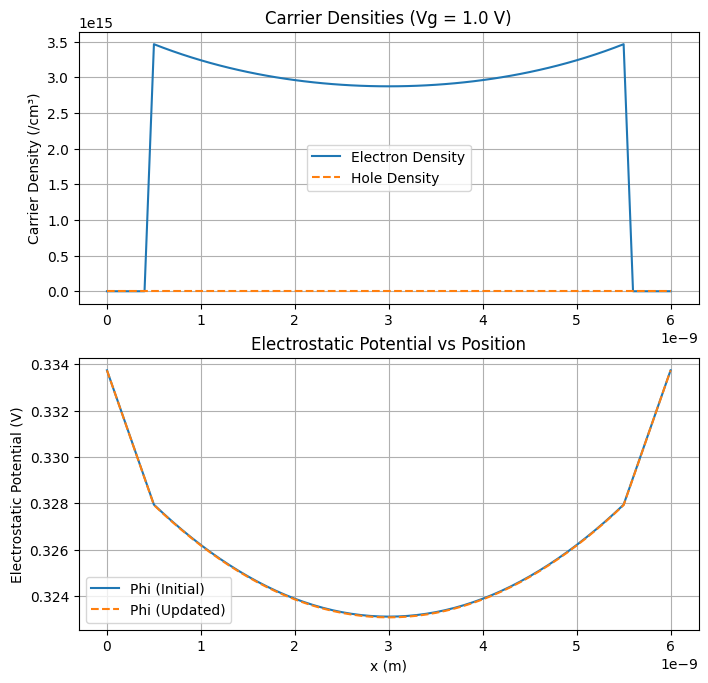

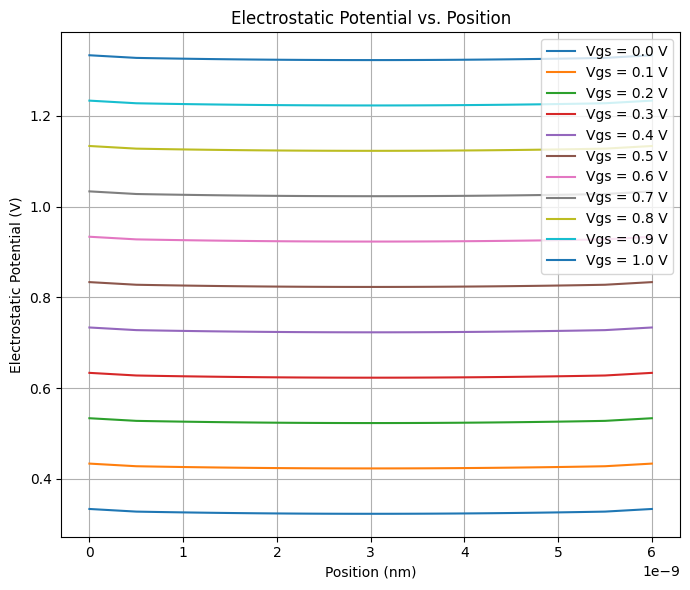

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Variable ####
t1 = 0.5e-9  # Oxide thickness, m
t2 = 5e-9  # Silicon thickness, m
N = 61
Na = 1e18*1e6 # Doping concentration, 1/m^3

# constant
q = 1.602e-19  # Elementary charge, C
a = 2*t1+t2
dx = a / (N - 1)  # delta x, m
interface1 = round(t1 / dx)
interface2 = round((t1 + t2) / dx)
e1 = 3.9   # Relative permittivity of oxide
e2 = 11.7  # Relative permittivity of silicon
e0 = 8.854e-12  # Vacuum permittivity, F/m
coeff = dx * dx * q / e0
nint = 1.075e16
T = 300
k_B = 1.380662e-23
kT = k_B * T / q

# Arrays
eDensity = np.zeros((N, 11))
hDensity = np.zeros((N, 11))
phi = np.zeros((N, 11))
phi_update = np.zeros((N, 11))

# Matrix builder function
def build_matrix(N, interface1, interface2, e2, e1, coeff, Na, eDensity_col, Vg):
    A = np.zeros((N, N))
    b = np.zeros(N)
    
    for ii in range(N):
        if ii == 0 or ii == N - 1:
            A[ii, ii] = 1
            b[ii] = 0.33374 + Vg
        elif interface1 < ii < interface2:
            A[ii, ii - 1] = e2; A[ii, ii] = -2 * e2; A[ii, ii + 1] = e2
            b[ii] = coeff * (Na + eDensity_col[ii])
        elif ii < interface1 or ii > interface2:
            A[ii, ii - 1] = e1; A[ii, ii] = -2 * e1; A[ii, ii + 1] = e1
            b[ii] = 0
        elif ii == interface1:
            A[ii, ii - 1] = e1; A[ii, ii] = -e1 - e2; A[ii, ii + 1] = e2
            b[ii] = coeff * (Na + eDensity_col[ii]) / 2
        elif ii == interface2:
            A[ii, ii - 1] = e2; A[ii, ii] = -e1 - e2; A[ii, ii + 1] = e1
            b[ii] = coeff * (Na + eDensity_col[ii]) / 2

    return A, b

# Main simulation loop
for iVg in range(11):
    Vg = iVg * 0.1
    eDensity_col = np.zeros(N)
    A, b = build_matrix(N, interface1, interface2, e2, e1, coeff, Na, eDensity_col, Vg)
    phi[:, iVg] = np.linalg.solve(A, b)

    for ii in range(N):
        if interface1 <= ii <= interface2:
            eDensity[ii, iVg] = nint * np.exp(+phi[ii, iVg] / kT)
            hDensity[ii, iVg] = nint * np.exp(-phi[ii, iVg] / kT)

    A, b = build_matrix(N, interface1, interface2, e2, e1, coeff, Na, eDensity[:, iVg], Vg)
    phi_update[:, iVg] = np.linalg.solve(A, b)

# Convert to cm^-3
eDensity /= 1e6
hDensity /= 1e6

x = np.linspace(0, a, N)

# Plot Electron and Hole Densities
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(x, eDensity[:, 0], label='Electron Density') # 모든 행, 마지막 열, Python에서는 인덱스 -1이 마지막을 뜻해요.# plt.plot, eDensiy[:,-1], Vg=1V를 넣어보자
plt.plot(x, hDensity[:, 0], '--', label='Hole Density')
plt.ylabel('Carrier Density (/cm³)'), plt.title('Carrier Densities (Vg = 1.0 V)')
plt.grid(True), plt.legend()

# Plot Phi
plt.subplot(3, 1, 2)
plt.plot(x, phi[:, 0], label='Phi (Initial)')
plt.plot(x, phi_update[:, 0], '--', label='Phi (Updated)')
plt.xlabel('x (m)'), plt.ylabel('Electrostatic Potential (V)'), plt.title('Electrostatic Potential vs Position')
plt.grid(True), plt.legend()

plt.figure(figsize=(7, 6))
for i in range(0, 11, 1):  # Plot every 0.2V step for clarity
    plt.plot(x, phi[:, i], label=f'Vgs = {i*0.1:.1f} V')

plt.xlabel('Position (nm)'), plt.ylabel('Electrostatic Potential (V)'), plt.title('Electrostatic Potential vs. Position')
plt.legend(), plt.grid(True)

plt.tight_layout()
plt.show()
